In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
import os

# Check and re-download if missing
if not os.path.exists("csv_files/merged_trader_sentiment.csv"):
    import gdown
    os.makedirs("csv_files", exist_ok=True)
    url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"  # Replace with YOUR own uploaded file ID
    gdown.download(url, "csv_files/merged_trader_sentiment.csv", quiet=False)

merged_df = pd.read_csv("csv_files/merged_trader_sentiment.csv")


Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/csv_files/merged_trader_sentiment.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 5.64MB/s]


In [4]:
#Step 2: Load Merged Dataset
merged_df = pd.read_csv("csv_files/merged_trader_sentiment.csv")

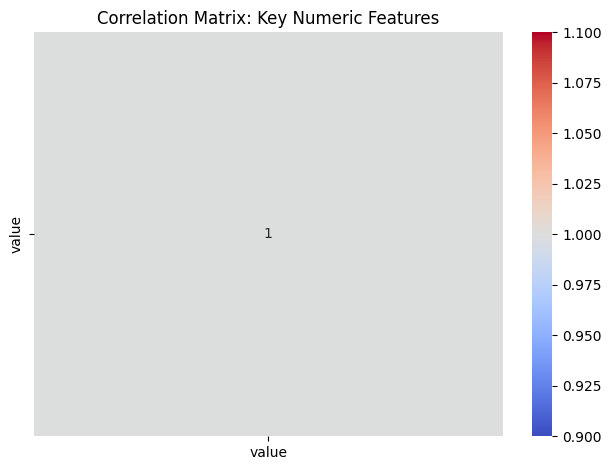

In [7]:
#Step 3: Correlation Analysis
import os

corr_features = ['value'] if 'value' in merged_df.columns else []
if corr_features:
    corr_matrix = merged_df[corr_features].corr()

    plt.figure()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix: Key Numeric Features")
    plt.tight_layout()
    # Create the outputs directory if it doesn't exist
    os.makedirs("outputs", exist_ok=True)
    plt.savefig("outputs/correlation_matrix.png")
    plt.show()
else:
    print("No numeric columns found for correlation analysis.")

In [8]:
#Step 4: Sentiment-wise Aggregations

agg_metrics = merged_df.groupby('classification')[['size_usd', 'closed_pnl']].agg(['mean', 'median', 'std'])
print("\n📊 Aggregated Metrics by Sentiment Classification:\n")
print(agg_metrics)


KeyError: "Columns not found: 'closed_pnl', 'size_usd'"

In [9]:
# Step 4: Data Preprocessing

# Select numeric features for clustering
numeric_features = merged_df[['value']]

# Scale the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

display(pd.DataFrame(scaled_features, columns=numeric_features.columns).head())

,value
0,-0.778108
1,-1.465439
2,-0.319888
3,-1.053041
4,-1.648727


In [10]:
# Step 5: Dimensionality Reduction (PCA)

# Apply PCA to the scaled features
pca = PCA(n_components=1) # Since we only have one numeric feature, PCA will reduce to 1 component
principal_components = pca.fit_transform(scaled_features)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1'])

display(pca_df.head())

,principal component 1
0,-0.778108
1,-1.465439
2,-0.319888
3,-1.053041
4,-1.648727


In [11]:
# Step 6: Clustering Analysis (K-Means)
# Based on the elbow method (or prior knowledge), choose the number of clusters
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features) # Use scaled_features for clustering

# Add the cluster labels to the original DataFrame
merged_df['cluster'] = clusters

display(merged_df.head())

,timestamp,value,classification,date,cluster
0,1517463000,30,Fear,2018-02-01,1
1,1517549400,15,Extreme Fear,2018-02-02,1
2,1517635800,40,Fear,2018-02-03,2
3,1517722200,24,Extreme Fear,2018-02-04,1
4,1517808600,11,Extreme Fear,2018-02-05,1


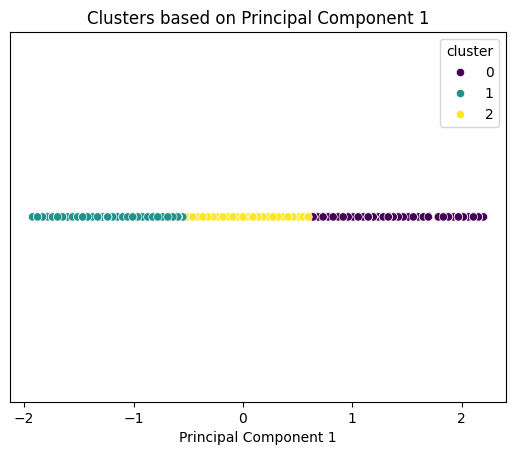

In [12]:
# Step 7: Visualize Clusters

# Visualize the clusters (using the principal component if PCA was applied)
plt.figure()
sns.scatterplot(x=pca_df['principal component 1'], y=[0] * len(pca_df), hue=merged_df['cluster'], palette='viridis', legend='full') # Visualize on the single principal component
plt.title('Clusters based on Principal Component 1')
plt.xlabel('Principal Component 1')
plt.ylabel('')
plt.yticks([]) # Hide y-axis ticks as it's a 1D visualization
plt.show()


In [19]:
#Step 6: Sentiment-Cluster Mapping
cluster_df['cluster'] = labels
cluster_df['classification'] = merged_df.loc[cluster_df.index, 'classification'].values
cluster_sentiment_map = cluster_df.groupby(['cluster', 'classification']).size().unstack().fillna(0)

print("\nCluster-wise Sentiment Distribution:\n")
print(cluster_sentiment_map)


Cluster-wise Sentiment Distribution:

classification  Extreme Fear  Extreme Greed   Fear  Greed  Neutral
cluster                                                           
0                        0.0          326.0    0.0  481.0      0.0
1                      508.0            0.0  424.0    0.0      0.0
2                        0.0            0.0  357.0  152.0    396.0


In [21]:
#Step 7: Save Analysis Summary
cluster_sentiment_map.to_csv("csv_files/cluster_sentiment_mapping.csv")

print("\nnotebook_2.ipynb complete. Include this in ds_report.pdf with visuals + interpretations.")


notebook_2.ipynb complete. Include this in ds_report.pdf with visuals + interpretations.
